In [63]:
# İmporting the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os 
import sys 

# Importing the dataset path
project_path = os.path.abspath(os.path.join(os.path.dirname('__file__'), '..'))
sys.path.append(project_path)
data_path = os.path.join(project_path, 'data')

In [64]:
# load the dataset
train_df = pd.read_csv(os.path.join(data_path, 'train.csv'))
test_df = pd.read_csv(os.path.join(data_path, 'test.csv'))
train_df.sample(10)

,call_start_time,callerid,called_num,disposition
50633,2020-11-26 18:57:41,618659a65b12db68ad774c0e503b691cf1520d20296914...,3e02b267c32b77f9d1aa5c489f9801b9d313522aafd31d...,ANSWER
50787,2020-03-19 13:57:10,618659a65b12db68ad774c0e503b691cf1520d20296914...,45454da40893974ec6404763c1c66067c0e3b4a7a577fa...,No Answer
105267,2022-02-07 15:53:21,618659a65b12db68ad774c0e503b691cf1520d20296914...,f5fdfcb55ddaa421b89c3182c734f031690c97e2bb8c5f...,No Answer
90648,2020-03-13 15:20:26,618659a65b12db68ad774c0e503b691cf1520d20296914...,5c906884299d6e68da3ed2049a8cf47657dd518bd484c5...,No Answer
31091,2021-08-28 09:30:03,618659a65b12db68ad774c0e503b691cf1520d20296914...,0dadb8bac74c89cf2850441d8a768f4f6bba3ae22b246c...,ANSWER
115232,2021-10-13 12:31:19,618659a65b12db68ad774c0e503b691cf1520d20296914...,c4cc0200802d825bea0255c32c878721be13cc7839e68f...,ANSWER
107481,2021-02-05 16:47:45,618659a65b12db68ad774c0e503b691cf1520d20296914...,209c55ee3b1ccd795098324b05e95298246d3716baa477...,No Answer
93029,2022-02-04 13:41:40,618659a65b12db68ad774c0e503b691cf1520d20296914...,69674569858a67fd250ea923613065673f570d3be78345...,ANSWER
131523,2020-03-23 11:38:49,618659a65b12db68ad774c0e503b691cf1520d20296914...,6890dc2d5c10ef89f75ef93fad221935bd72d30678fbe4...,No Answer
46515,2020-06-01 13:26:07,618659a65b12db68ad774c0e503b691cf1520d20296914...,3c06895552c6c5f45abda2e9bdbdcc68d9ce0020ed9462...,No Answer


In [65]:
# copy the dataset to df and describe it
df = train_df.copy()
df.describe()

,call_start_time,callerid,called_num,disposition
count,134189,134189,134189,114190
unique,123422,3,126212,2
top,2019-02-12 16:14:54,618659a65b12db68ad774c0e503b691cf1520d20296914...,da35bd45709391715dfdac5c2f1b2a4d862a0b4ccc892b...,ANSWER
freq,15,128222,6,61618


In [117]:
df_test = test_df.copy()
df_test.describe()

,call_start_time,callerid,called_num,disposition
count,3998,3998,3998,3998
unique,3986,3,3995,2
top,2020-05-21 09:38:43,618659a65b12db68ad774c0e503b691cf1520d20296914...,f7ea029ca6229f2f866377644bf436ccf5f727cdb2499c...,ANSWER
freq,2,3811,2,1999


In [66]:
# check the missing values and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134189 entries, 0 to 134188
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   call_start_time  134189 non-null  object
 1   callerid         134189 non-null  object
 2   called_num       134189 non-null  object
 3   disposition      114190 non-null  object
dtypes: object(4)
memory usage: 4.1+ MB


In [118]:
# Test data info
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   call_start_time  3998 non-null   object
 1   callerid         3998 non-null   object
 2   called_num       3998 non-null   object
 3   disposition      3998 non-null   object
dtypes: object(4)
memory usage: 125.1+ KB


In [67]:
# sum of missing values
df.isnull().sum()

call_start_time        0
callerid               0
called_num             0
disposition        19999
dtype: int64

In [120]:
# Test data missing values
test_df.isnull().sum()

# drop the missing values not found in test data

call_start_time    0
callerid           0
called_num         0
disposition        0
dtype: int64

In [121]:
# drop the missing values
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114190 entries, 0 to 134188
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   call_start_time  114190 non-null  datetime64[ns]
 1   callerid         114190 non-null  object        
 2   called_num       114190 non-null  object        
 3   disposition      114190 non-null  object        
 4   is_shift         114190 non-null  int64         
 5   hour             114190 non-null  int64         
 6   minute           114190 non-null  int64         
 7   is_weekend       114190 non-null  int64         
 8   called_count     114190 non-null  int64         
 9   caller_id        114190 non-null  int64         
dtypes: datetime64[ns](1), int64(6), object(3)
memory usage: 9.6+ MB


In [69]:
# group by the target variable
dispotion = df.groupby('disposition')['disposition']
dispotion.count()

disposition
ANSWER       61618
No Answer    52572
Name: disposition, dtype: int64

In [70]:
# find call_start_time is in the shift or not
df['call_start_time'] = pd.to_datetime(df['call_start_time'])
df['is_shift'] = df['call_start_time'].dt.strftime('%H:%M').apply(lambda x: 1 if (x >='09:00' and x <='12:00') or (x >='13:30' and x <='18:00') else 0)
df.sample(10)


,call_start_time,callerid,called_num,disposition,is_shift
32679,2021-07-14 18:29:05,618659a65b12db68ad774c0e503b691cf1520d20296914...,ef3e4b8510cc296727593b0083b3fa14d9a5960d7dcb55...,ANSWER,0
12765,2021-01-20 13:50:23,618659a65b12db68ad774c0e503b691cf1520d20296914...,9b69ad38eb4a2583f3fdb7774664eb06c0619be76b2e73...,No Answer,1
129468,2021-06-21 13:02:48,618659a65b12db68ad774c0e503b691cf1520d20296914...,6e8e7b8ebf029c40e824189b379b2d16b139c870de182c...,ANSWER,0
118104,2020-10-13 15:51:28,618659a65b12db68ad774c0e503b691cf1520d20296914...,0014762f9506cb57f640826d64d88d1aabd20bb72e69dc...,No Answer,1
948,2020-06-21 09:31:39,618659a65b12db68ad774c0e503b691cf1520d20296914...,ffc1b545a701436168027cb137fd29a4638df0763ab90f...,No Answer,1
41496,2021-08-15 15:19:12,618659a65b12db68ad774c0e503b691cf1520d20296914...,1562d1b489cc6020832ea6b3da13397b98f379f0b3cd35...,ANSWER,1
41508,2021-11-01 14:25:11,618659a65b12db68ad774c0e503b691cf1520d20296914...,94b6299cc6017f36e5e74a78b7185352d79ab922004d0d...,ANSWER,1
69723,2020-08-21 13:11:14,618659a65b12db68ad774c0e503b691cf1520d20296914...,86ece8e11c5a376fe4bb5fb3359c1eb8e2ed0ad2d52bee...,No Answer,0
22680,2022-02-07 12:10:45,618659a65b12db68ad774c0e503b691cf1520d20296914...,7856e03d27e7be385d15a79310a2e6f6f72d150c90c8dc...,ANSWER,0
86651,2020-07-18 18:53:07,618659a65b12db68ad774c0e503b691cf1520d20296914...,2305bce47f06172e33e8fd0c94b40377ddbdd6f3f7e0a2...,No Answer,0


In [122]:
# find call_start_time is in the shift or not in test data
df_test['call_start_time'] = pd.to_datetime(df_test['call_start_time'])
df_test['is_shift'] = df_test['call_start_time'].dt.strftime('%H:%M').apply(lambda x: 1 if (x >='09:00' and x <='12:00') or (x >='13:30' and x <='18:00') else 0)
df_test.sample(10)

,call_start_time,callerid,called_num,disposition,is_shift
1628,2020-12-19 09:43:31,618659a65b12db68ad774c0e503b691cf1520d20296914...,4fa25f8885b2acc3cebadb3ca95fb3ffa7d39a7f09eda7...,No Answer,1
2116,2021-12-07 17:41:09,618659a65b12db68ad774c0e503b691cf1520d20296914...,539498b7f549e19fa8188f85706adcb0d79d27e3e29cf4...,ANSWER,1
2610,2021-05-11 09:30:58,618659a65b12db68ad774c0e503b691cf1520d20296914...,22b8555ac0a1ff78480590a684c4f1392575408d3ade27...,No Answer,1
1197,2021-08-30 09:30:47,618659a65b12db68ad774c0e503b691cf1520d20296914...,e38c3f9cf5c53ddd94210efa63a489868a762019b066ab...,No Answer,1
1265,2021-06-19 12:34:38,618659a65b12db68ad774c0e503b691cf1520d20296914...,b4a2a3496f71e6a66ed865b317625bbc5264fa5f704723...,ANSWER,0
2121,2020-05-09 09:38:47,618659a65b12db68ad774c0e503b691cf1520d20296914...,369c95c4e891dce5a9e005c9c746b6fcfad56d8de969fd...,No Answer,1
2050,2022-02-20 09:31:05,618659a65b12db68ad774c0e503b691cf1520d20296914...,2cfaec254624e5a0af3b7cddcb4f108fe80d5e1d683f09...,ANSWER,1
2400,2021-01-29 15:34:24,618659a65b12db68ad774c0e503b691cf1520d20296914...,cfe573df40ef5741f6a8987b623b8acae7f72df378f7ef...,ANSWER,1
1473,2020-09-22 14:05:19,618659a65b12db68ad774c0e503b691cf1520d20296914...,3ce7e65b228fadad52be548072be84c8bcf682cadb1b8b...,No Answer,1
1622,2018-12-11 11:56:13,e66956cc5f9e5b3218e478273aa91c6a2a29293b59f046...,08505a9564aef9e82e72ca926ee350b38267112252df33...,ANSWER,1


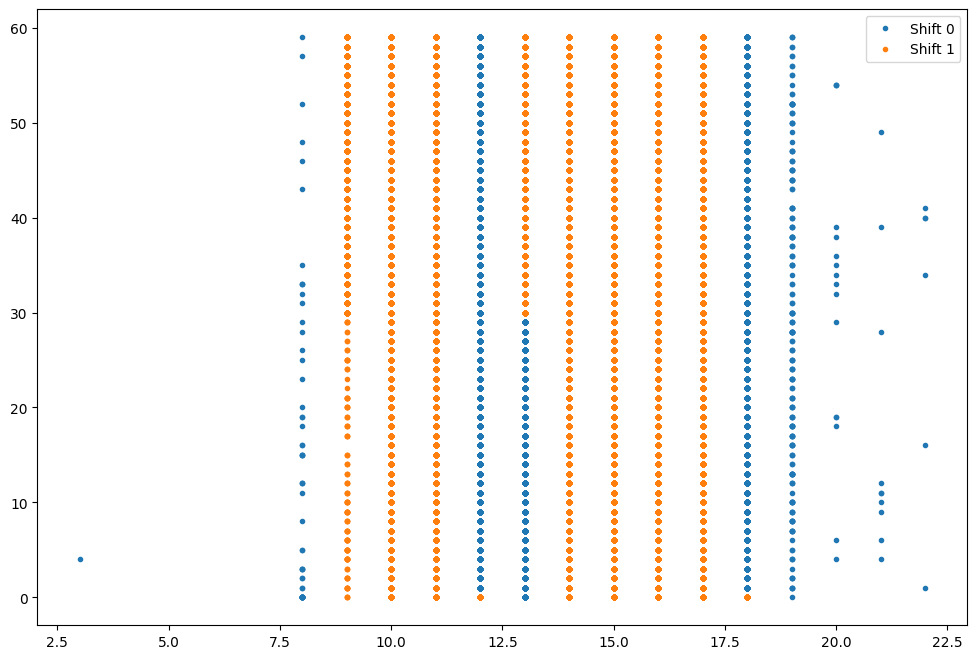

In [71]:
# "call_start_time" sütununu datetime veri tipine dönüştürme
df['call_start_time'] = pd.to_datetime(df['call_start_time'])

# Saat ve dakika bilgilerini ayrıştırma
df['hour'] = df['call_start_time'].dt.hour
df['minute'] = df['call_start_time'].dt.minute

# "is_shift" sütununa göre verileri ayırma
shift_0_data = df[df['is_shift'] == 0]
shift_1_data = df[df['is_shift'] == 1]

# Grafikleri çizin
plt.figure(figsize=(12, 8))
plt.plot(shift_0_data['hour'], shift_0_data['minute'], '.', label='Shift 0')
plt.plot(shift_1_data['hour'], shift_1_data['minute'], '.', label='Shift 1')

plt.legend()
plt.show()

In [100]:
# find call_start_time is in the shift or not change the time 
df['call_start_time'] = pd.to_datetime(df['call_start_time'])
df['is_shift'] = df['call_start_time'].dt.strftime('%H:%M').apply(lambda x: 1 if (x >='08:00' and x <='12:00') or (x >='13:30' and x <='17:30') else 0)

#df.drop(['hour', 'minute'], axis=1, inplace=True)
df.sample(10)

,call_start_time,callerid,called_num,disposition,is_shift,hour,minute,is_weekend,called_count,caller_id
10775,2020-04-27 14:51:32,618659a65b12db68ad774c0e503b691cf1520d20296914...,1a694919d91f26c9e46b87c0ca3d47b42659e929065c0d...,No Answer,1,14,51,0,1,0
126773,2021-03-28 10:22:15,618659a65b12db68ad774c0e503b691cf1520d20296914...,046419b8a7ccb80951a6063f1f75d2f0e18e9f0f638d9b...,ANSWER,1,10,22,1,2,0
49612,2021-06-07 11:45:06,618659a65b12db68ad774c0e503b691cf1520d20296914...,88ac273d05db74d7b02eb569e2424d7cb95ff83f3c30f1...,No Answer,1,11,45,0,1,0
33197,2021-06-05 09:43:22,618659a65b12db68ad774c0e503b691cf1520d20296914...,c7d9c541df92f6969db9bf5c13707e4a6de23a1b524fa5...,No Answer,1,9,43,1,1,0
16074,2021-12-30 17:22:12,d47023387836712c3721769f01e7d63ca2a481c2d34704...,416a4f8faec00020922bb01ceb8839e93a25b228fe1116...,ANSWER,1,17,22,0,1,1
51393,2021-12-11 16:11:25,618659a65b12db68ad774c0e503b691cf1520d20296914...,40cae7aaebf866977655ccad9517326732410ccd8e24b9...,ANSWER,1,16,11,1,1,0
44255,2020-12-07 09:58:12,618659a65b12db68ad774c0e503b691cf1520d20296914...,20db4b0b0d4269d7b3a76afffee4e863c8d67c45f0f27f...,ANSWER,1,9,58,0,1,0
129252,2022-01-28 13:35:28,618659a65b12db68ad774c0e503b691cf1520d20296914...,2cc56944f3577510edc6d9cad5a43b1df25b6a2ebde089...,ANSWER,1,13,35,0,1,0
97420,2021-05-31 16:16:02,618659a65b12db68ad774c0e503b691cf1520d20296914...,e75c5da956b041bbbe4ad1477613cfb967dad9927c445e...,ANSWER,1,16,16,0,1,0
71134,2021-03-14 14:41:06,618659a65b12db68ad774c0e503b691cf1520d20296914...,6aa880c6c988eeca73c4be9a97879ce34b804b3b098e4c...,ANSWER,1,14,41,1,1,0


In [123]:
# find call_start_time is in the shift or not change the time  in test data
df_test['call_start_time'] = pd.to_datetime(df_test['call_start_time'])
df_test['is_shift'] = df_test['call_start_time'].dt.strftime('%H:%M').apply(lambda x: 1 if (x >='08:00' and x <='12:00') or (x >='13:30' and x <='17:30') else 0)


In [124]:
# "call_start_time" sütununu datetime veri tipine dönüştürme in test data
df_test['call_start_time'] = pd.to_datetime(df_test['call_start_time'])

# Saat ve dakika bilgilerini ayrıştırma in test data
df_test['hour'] = df_test['call_start_time'].dt.hour
df_test['minute'] = df_test['call_start_time'].dt.minute


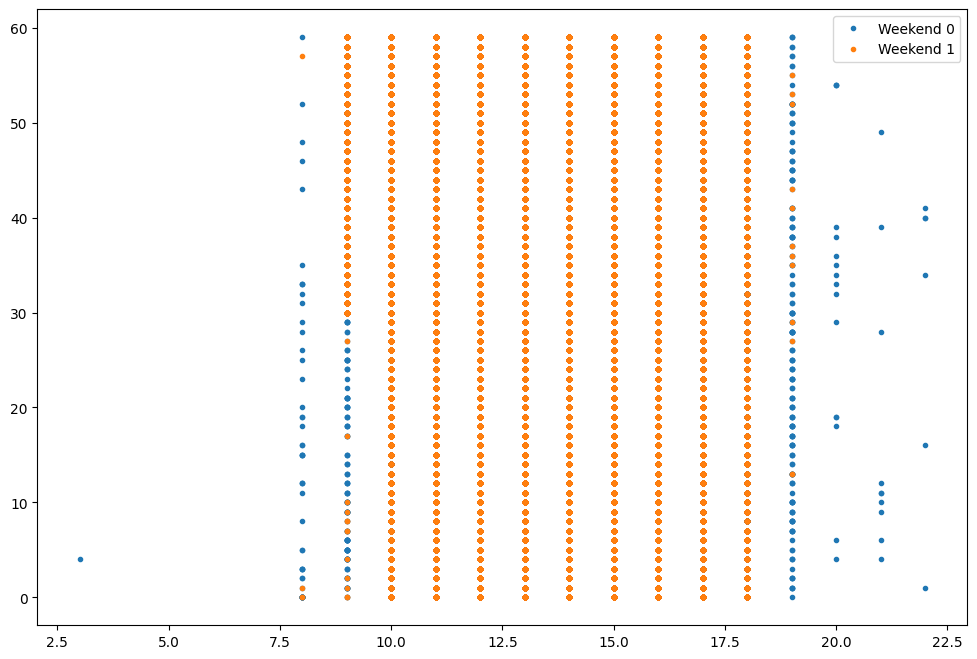

In [125]:
# find call_start_time is in the weekend or not
df['is_weekend'] = df['call_start_time'].dt.dayofweek.isin([5,6]).apply(lambda x: 1 if x == True else 0)

# is_weekend visualization
weekend_0_data = df[df['is_weekend'] == 0]
weekend_1_data = df[df['is_weekend'] == 1]

plt.figure(figsize=(12, 8))
plt.plot(weekend_0_data['hour'], weekend_0_data['minute'], '.', label='Weekend 0')
plt.plot(weekend_1_data['hour'], weekend_1_data['minute'], '.', label='Weekend 1')

plt.legend()
plt.show()


In [126]:
# find call_start_time is in the weekend or not in test data
df_test['is_weekend'] = df_test['call_start_time'].dt.dayofweek.isin([5,6]).apply(lambda x: 1 if x == True else 0)
df_test


,call_start_time,callerid,called_num,disposition,is_shift,hour,minute,is_weekend
0,2021-11-28 13:15:52,618659a65b12db68ad774c0e503b691cf1520d20296914...,5eb85e040c31d9b1d68da5cf749055008018f38fedce87...,ANSWER,0,13,15,1
1,2021-05-06 16:23:39,618659a65b12db68ad774c0e503b691cf1520d20296914...,7d1a6c9598c5d73c131edda47957ec9c0c1a58094938b5...,ANSWER,1,16,23,0
2,2021-07-28 15:41:02,618659a65b12db68ad774c0e503b691cf1520d20296914...,d5f30470fe78332b79a218809b4e5eadac04345e313d74...,No Answer,1,15,41,0
3,2021-03-03 16:03:58,618659a65b12db68ad774c0e503b691cf1520d20296914...,91c36f74d9ff7e1f6c9bc3536ac3a7feeed8348227007b...,No Answer,1,16,3,0
4,2021-01-22 13:12:42,618659a65b12db68ad774c0e503b691cf1520d20296914...,23baba5114a20eeec8acb337d6e2d108092ccf0729cc4f...,ANSWER,0,13,12,0
...,...,...,...,...,...,...,...,...
3993,2020-12-10 14:43:21,618659a65b12db68ad774c0e503b691cf1520d20296914...,0715e98ac5bc9feee1c7045830619cea835c8d2edec93b...,ANSWER,1,14,43,0
3994,2020-05-19 17:07:04,618659a65b12db68ad774c0e503b691cf1520d20296914...,246a4ac581a3af1f614b25983a76b4fe42eee67d46658b...,No Answer,1,17,7,0
3995,2020-12-29 13:58:36,618659a65b12db68ad774c0e503b691cf1520d20296914...,81414366567819fc65677735f5d7ab3af260409d58a1d2...,No Answer,1,13,58,0
3996,2021-05-01 12:29:46,618659a65b12db68ad774c0e503b691cf1520d20296914...,488c824ff563677538d7bfab8206bfeb730d17aa42c908...,ANSWER,0,12,29,1


In [102]:
# called_number repetition count 
df['called_count'] = df.groupby('called_num')['called_num'].transform('count')
df.sample(10)


,call_start_time,callerid,called_num,disposition,is_shift,hour,minute,is_weekend,called_count,caller_id
55649,2020-09-22 15:47:53,618659a65b12db68ad774c0e503b691cf1520d20296914...,352eb3d363d01cffaa2afdc5a7d39945347c453e87ecf1...,No Answer,1,15,47,0,1,0
68349,2020-03-10 15:20:43,618659a65b12db68ad774c0e503b691cf1520d20296914...,951cafc2812b61cf12aaf73bfc7b2bf86be02cd81a085a...,No Answer,1,15,20,0,2,0
42434,2021-11-11 12:03:44,618659a65b12db68ad774c0e503b691cf1520d20296914...,13ebe692890f929bbab2787236a816ce964acb3878979b...,ANSWER,0,12,3,0,1,0
99223,2020-03-05 09:30:27,618659a65b12db68ad774c0e503b691cf1520d20296914...,dd092e59228676712502336a18cb2dcf192b12b525d972...,No Answer,1,9,30,0,1,0
26189,2020-08-10 12:00:44,618659a65b12db68ad774c0e503b691cf1520d20296914...,20e423f3edc15aa7f63b8402b4815d4f254f3e5e4c330a...,No Answer,1,12,0,0,1,0
22602,2021-09-27 11:18:10,618659a65b12db68ad774c0e503b691cf1520d20296914...,d0fa4be40f40bb46c555230c5d8c116293942cf9c10e4d...,No Answer,1,11,18,0,1,0
89532,2021-09-29 14:17:14,618659a65b12db68ad774c0e503b691cf1520d20296914...,a376909f572371ae845631be8292ac41c4708390ed1071...,ANSWER,1,14,17,0,1,0
57613,2021-01-15 15:01:02,e66956cc5f9e5b3218e478273aa91c6a2a29293b59f046...,9925ba16de2a2e61f567b195ffa4c4aa6a44b4739f62bd...,No Answer,1,15,1,0,1,2
69977,2021-04-16 13:00:12,618659a65b12db68ad774c0e503b691cf1520d20296914...,3d7def156b5151cd5132d57f2f953f31e37229bffef4d0...,ANSWER,0,13,0,0,1,0
48310,2021-12-02 09:32:03,618659a65b12db68ad774c0e503b691cf1520d20296914...,5040198193875c7b1778f4a8758d1e21799843531fcbea...,No Answer,1,9,32,0,1,0


In [127]:
# called_number repetition count in test data
df_test['called_count'] = df_test.groupby('called_num')['called_num'].transform('count')
df_test.sample(10)

,call_start_time,callerid,called_num,disposition,is_shift,hour,minute,is_weekend,called_count
3228,2021-05-10 12:21:23,618659a65b12db68ad774c0e503b691cf1520d20296914...,e1d55b499597ec6cbde66d3cb0fd05c441b172f32aaf6e...,ANSWER,0,12,21,0,1
3962,2020-10-26 10:03:13,618659a65b12db68ad774c0e503b691cf1520d20296914...,f8c99c8bbce2a357cfd6b2a0ba9e02f1605f9aa32f3fba...,ANSWER,1,10,3,0,1
2482,2020-05-05 14:11:27,618659a65b12db68ad774c0e503b691cf1520d20296914...,acf789552e98f99a0a870ee10a038a3aa6651158811c04...,No Answer,1,14,11,0,1
2124,2020-06-05 10:20:04,618659a65b12db68ad774c0e503b691cf1520d20296914...,db3873f7cd2f7ff102743896f18d1e49196cae2e834022...,No Answer,1,10,20,0,1
2416,2022-02-28 11:37:12,d47023387836712c3721769f01e7d63ca2a481c2d34704...,4a01ea0064fec689b3feb7f1a24e67544b6d12cb3c1c75...,ANSWER,1,11,37,0,1
1756,2021-10-13 09:31:43,618659a65b12db68ad774c0e503b691cf1520d20296914...,09cefcc9ea1a3b9fed0b377b02792766d3d9d0564a4985...,No Answer,1,9,31,0,1
2545,2021-07-24 14:22:11,618659a65b12db68ad774c0e503b691cf1520d20296914...,474fc407039fa529346cab7b420bca98abae32a6126d43...,ANSWER,1,14,22,1,1
2237,2020-04-22 09:39:55,618659a65b12db68ad774c0e503b691cf1520d20296914...,7362c9c2dc6577df756338f2ebd9ce045b3d444ca06306...,No Answer,1,9,39,0,1
1131,2021-08-07 14:16:08,618659a65b12db68ad774c0e503b691cf1520d20296914...,18305a2648e8e82aac3eadcbca1ad30777b71886044374...,ANSWER,1,14,16,1,1
3229,2020-04-15 13:20:58,618659a65b12db68ad774c0e503b691cf1520d20296914...,ae68813a75b973ca94106f0cdc51c88e5d168368234450...,No Answer,0,13,20,0,1


In [103]:
caller_group = df.groupby('callerid')['callerid']
caller_group.count()

callerid
618659a65b12db68ad774c0e503b691cf1520d202969140288dd70538324c868    109309
d47023387836712c3721769f01e7d63ca2a481c2d3470429a744de0ff3d01617      2802
e66956cc5f9e5b3218e478273aa91c6a2a29293b59f04618276a9383d7218357      2079
Name: callerid, dtype: int64

In [128]:
# caller group in test data
caller_group_test = df_test.groupby('callerid')['callerid']
caller_group_test.count()

callerid
618659a65b12db68ad774c0e503b691cf1520d202969140288dd70538324c868    3811
d47023387836712c3721769f01e7d63ca2a481c2d3470429a744de0ff3d01617     108
e66956cc5f9e5b3218e478273aa91c6a2a29293b59f04618276a9383d7218357      79
Name: callerid, dtype: int64

In [129]:
df['caller_id'] = caller_group.ngroup()
df.sample(20)


,call_start_time,callerid,called_num,disposition,is_shift,hour,minute,is_weekend,called_count,caller_id
90598,2021-01-27 14:42:21,618659a65b12db68ad774c0e503b691cf1520d20296914...,459cd6c2828ec0a37fbb3a4bfd3ea3b98e87665d4da760...,ANSWER,1,14,42,0,1,0
54036,2022-01-28 14:11:22,618659a65b12db68ad774c0e503b691cf1520d20296914...,85448195afe74483c2b8744a6b80799d5f508c61cc2a60...,ANSWER,1,14,11,0,1,0
126759,2020-04-15 13:52:43,618659a65b12db68ad774c0e503b691cf1520d20296914...,d18b62f44321758222489bf0e0d6eda6a14221340209ba...,No Answer,1,13,52,0,3,0
95907,2020-11-13 13:00:30,618659a65b12db68ad774c0e503b691cf1520d20296914...,057defc7dafd168eb99c98dd0d2e2851d370f89b9cf9db...,ANSWER,0,13,0,0,1,0
56931,2021-06-04 09:34:39,618659a65b12db68ad774c0e503b691cf1520d20296914...,cecd6475f614aa4cc9da814b960b2718ee011ad0bb41ae...,No Answer,1,9,34,0,1,0
117756,2021-05-08 11:09:04,618659a65b12db68ad774c0e503b691cf1520d20296914...,417d84be0047170e0891a2f4264b2839dee2fc524f3f20...,No Answer,1,11,9,1,1,0
53876,2022-01-17 10:18:47,618659a65b12db68ad774c0e503b691cf1520d20296914...,eb93fbf30a2d75de7378db09400f0159cb4101ba0f9b5c...,ANSWER,1,10,18,0,1,0
6324,2021-08-30 13:26:33,618659a65b12db68ad774c0e503b691cf1520d20296914...,d58532826859b60ece84e8e5fa31b356af0eea3837f9d2...,No Answer,0,13,26,0,1,0
115847,2020-06-26 10:03:55,618659a65b12db68ad774c0e503b691cf1520d20296914...,02fac8225109b49dc58905f0cdb68a74d24cf01836c036...,No Answer,1,10,3,0,1,0
125225,2021-04-13 17:00:45,618659a65b12db68ad774c0e503b691cf1520d20296914...,7fb0009fc274059c14de09b2082ad82431ec01d217249e...,No Answer,1,17,0,0,1,0


In [130]:
# caller group in test data
df_test['caller_id'] = caller_group_test.ngroup()

In [131]:
# drop the unnecessary columns and copy the train_data to train
train_data = df.copy()
train_data.drop(['call_start_time', 'callerid', 'called_num'], axis=1, inplace=True)
train_data.sample(10)

,disposition,is_shift,hour,minute,is_weekend,called_count,caller_id
65767,No Answer,1,13,38,0,1,1
28794,No Answer,1,16,0,0,1,0
98757,ANSWER,1,15,36,1,1,0
117524,No Answer,1,11,43,0,1,0
74356,No Answer,1,13,41,0,1,0
57974,ANSWER,1,15,25,0,1,0
96302,ANSWER,1,11,59,0,1,0
31077,No Answer,0,17,45,0,1,0
105925,No Answer,1,15,35,0,1,0
72023,No Answer,1,14,17,0,1,0


In [132]:
# drop the unnecessary columns and copy the test_data to test
test_data = df_test.copy()
test_data.drop(['call_start_time', 'callerid', 'called_num'], axis=1, inplace=True)
test_data.sample(10)

,disposition,is_shift,hour,minute,is_weekend,called_count,caller_id
1939,ANSWER,0,12,22,0,1,0
461,ANSWER,1,9,30,1,1,0
1132,No Answer,0,18,45,0,1,0
3973,ANSWER,1,9,33,1,1,0
1787,No Answer,1,11,45,1,1,0
3732,No Answer,0,13,15,0,1,0
674,No Answer,1,14,40,1,1,0
1045,No Answer,1,11,22,0,1,0
3305,ANSWER,0,12,29,0,1,0
2569,No Answer,0,18,52,0,1,0


In [136]:
# label encoding the target variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_data['disposition'] = le.fit_transform(train_data['disposition'])


# label encoding the target variable in test data
test_data['disposition'] = le.fit_transform(test_data['disposition'])


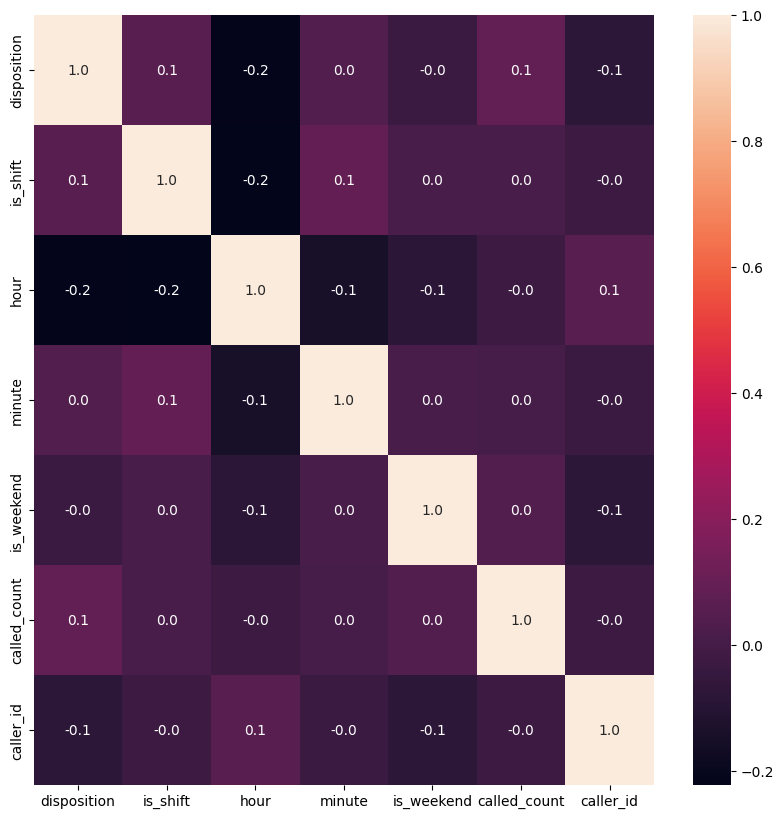

In [137]:
# dataset correlation
corr = train_data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, fmt='.1f')
plt.show()

In [138]:
# split the dataset to X_train, y_train, X_test, y_test just for code testing
from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(train_data.drop('disposition', axis=1), train_data['disposition'], test_size=0.2, random_state=42)
# X_train.shape, X_test.shape, y_train.shape, y_test.shape

X_train = train_data.drop('disposition', axis=1)
y_train = train_data['disposition']
X_test = test_data.drop('disposition', axis=1)
y_test = test_data['disposition']

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((114190, 6), (3998, 6), (114190,), (3998,))

In [85]:
#!pip install xgboost

     ---------------------------------------- 89.1/89.1 MB 1.2 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [139]:
# import XGBoost classifier
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [140]:
y_pred = xgb.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 1])

In [141]:
# import the metrics to evaluate the model
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score
print('Accuracy Score: ', accuracy_score(y_test, y_pred))
print('Recall Score: ', recall_score(y_test, y_pred, average='weighted'))
print('Precision Score: ', precision_score(y_test, y_pred, average='weighted'))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))

Accuracy Score:  0.6058029014507254
Recall Score:  0.6058029014507254
Precision Score:  0.648067488111027
Confusion Matrix: 
 [[1745  254]
 [1322  677]]


In [142]:
# Parameter Tuning with GridSearchCV
from sklearn.model_selection import GridSearchCV

# define the parameters
params = {
    'max_depth': [3, 4, 5, 6, 7, 8],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'n_estimators': [40, 50, 100, 200, 300],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4]
}

'''
    'min_child_weight': [1, 3, 5, 7],
    'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'reg_alpha': [0, 0.25, 0.5, 0.75, 1],
    'reg_lambda': [0.01, 0.1, 1, 10, 100]
'''

# define the model
xgb = XGBClassifier()

# define the grid search
grid_search = GridSearchCV(xgb, param_grid=params, scoring='accuracy', n_jobs=-1, verbose=3)

# fit the model
grid_search.fit(X_train, y_train)

# print the best parameters
grid_search.best_params_


Fitting 5 folds for each of 600 candidates, totalling 3000 fits


{'gamma': 0, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 300}

In [143]:
# train the model with best parameters
xgb = XGBClassifier(gamma=0, learning_rate=0.01, max_depth=5, n_estimators=300)
xgb.fit(X_train, y_train)

# predict the test data
y_pred = xgb.predict(X_test)

# evaluate the model
print('Accuracy Score: ', accuracy_score(y_test, y_pred))
print('Recall Score: ', recall_score(y_test, y_pred, average='weighted'))
print('Precision Score: ', precision_score(y_test, y_pred, average='weighted'))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))


Accuracy Score:  0.6063031515757878
Recall Score:  0.6063031515757878
Precision Score:  0.6578058032488594
Confusion Matrix: 
 [[1783  216]
 [1358  641]]


In [144]:
# KNNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [145]:
y_pred_knn = knn.predict(X_test)

print('Accuracy Score: ', accuracy_score(y_test, y_pred_knn)) 
print('Recall Score: ', recall_score(y_test, y_pred_knn, average='weighted'))
print('Precision Score: ', precision_score(y_test, y_pred_knn, average='weighted'))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred_knn))

Accuracy Score:  0.5822911455727864
Recall Score:  0.5822911455727864
Precision Score:  0.5833187431477859
Confusion Matrix: 
 [[1275  724]
 [ 946 1053]]


In [146]:
# DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)


DecisionTreeClassifier()

In [147]:
# predict the test data with DecisionTreeClassifier
y_pred_dtc = dtc.predict(X_test)

print('Accuracy Score: ', accuracy_score(y_test, y_pred_dtc))
print('Recall Score: ', recall_score(y_test, y_pred_dtc, average='weighted'))
print('Precision Score: ', precision_score(y_test, y_pred_dtc, average='weighted'))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred_dtc))

Accuracy Score:  0.6020510255127564
Recall Score:  0.6020510255127564
Precision Score:  0.6327253554132167
Confusion Matrix: 
 [[1684  315]
 [1276  723]]
